In [85]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [86]:
# Load the dataset
df = pd.read_csv('/Users/thinkwalnut/Desktop/vrushali/datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
# Number of rows and columns
df.shape

(1338, 7)

In [88]:
# Getting the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [89]:
# Is there any missing values present in this dataset
df.isnull().sum()

# If there is any missing values then there is some number present instead of zero. It can be handled by either mean, median or mode method.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis

In [90]:
# Statistical measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/Users/thinkwalnut/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


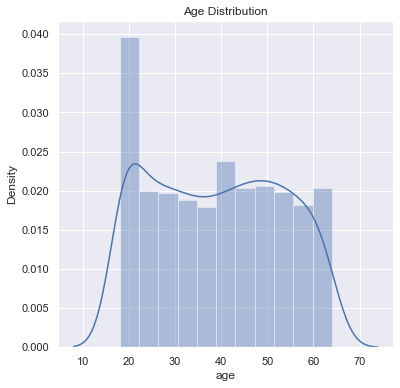

In [91]:
# Distribution of age column
sb.set()
plt.figure(figsize=(6,6))
sb.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

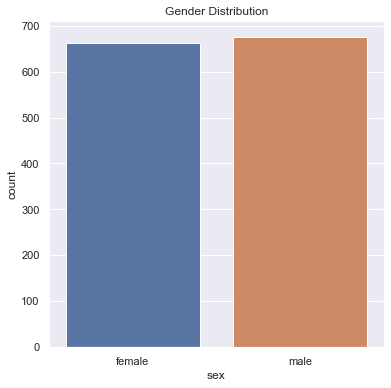

In [92]:
# Countplot of Gender column
plt.figure(figsize=(6,6))
sb.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

In [93]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/Users/thinkwalnut/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


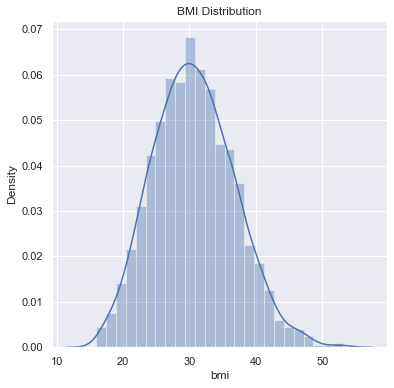

In [94]:
# Distribution of bmi column
sb.set()
plt.figure(figsize=(6,6))
sb.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

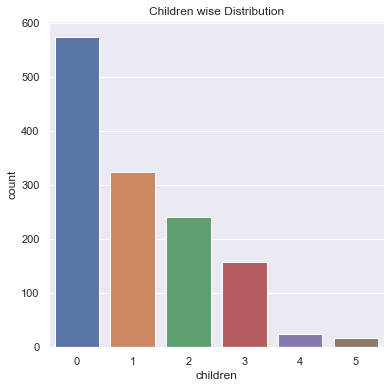

In [95]:
# Plot for children column
plt.figure(figsize=(6,6))
sb.countplot(x='children', data=df)
plt.title('Children wise Distribution')
plt.show()

In [96]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

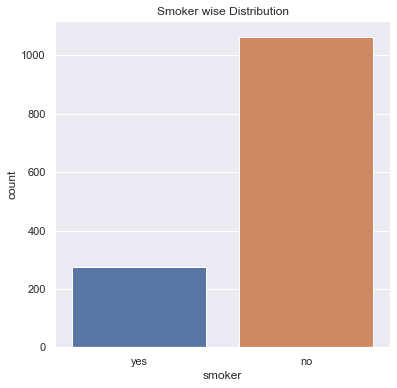

In [97]:
# Plot for smoker column
plt.figure(figsize=(6,6))
sb.countplot(x='smoker', data=df)
plt.title('Smoker wise Distribution')
plt.show()

In [98]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

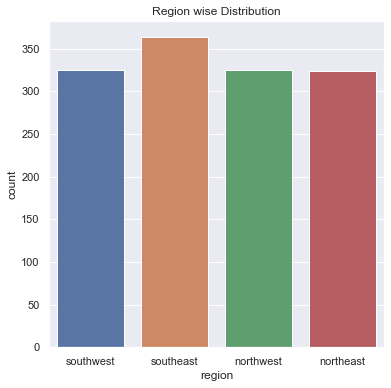

In [99]:
# Plot for region column
plt.figure(figsize=(6,6))
sb.countplot(x='region', data=df)
plt.title('Region wise Distribution')
plt.show()

In [100]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

/Users/thinkwalnut/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


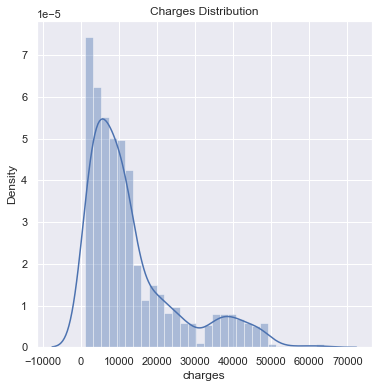

In [101]:
# Distribution of charge column
sb.set()
plt.figure(figsize=(6,6))
sb.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

# Data Pre processing

In [102]:
# Encoding the sex column
replace_these1 = {'male' : 0, 'female' : 1}
df.replace({'sex':replace_these1}, inplace =True)


# Encoding smoker column
replace_these2 = {'yes' : 0, 'no' : 1}
df.replace({'smoker':replace_these2}, inplace =True)


#Encoding region column

replace_these3 = {'southeast': 0, 'southwest':1, 'northeast':2, 'northwest':3}
df.replace({'region':replace_these3}, inplace =True)


In [103]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [104]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Model Training

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [106]:
# Checking if the model is generalised
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
for i in range(1,5):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
    model = LinearRegression()
    model.fit(X_train, Y_train)
    train_score = model.score(X_train, Y_train)
    test_score = model.score(X_test, Y_test)
    if test_score > train_score:
        print("test{}, train{}, i{}".format(test_score,train_score, i))
    else:
        print("model is not genaralised")

test0.7618294350214683, train0.7472945022920751, i1
test0.7618294350214683, train0.7472945022920751, i2
test0.7618294350214683, train0.7472945022920751, i3
test0.7618294350214683, train0.7472945022920751, i4


In [109]:
print("Accuracy is",model.score(X_test, Y_test)*100)

Accuracy is 76.18294350214683


In [ ]:
# Building a predictive model
input_data = (31,1,25.74,0,1,0)

# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape this above array
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print("The predicted cost in USD is:", prediction[0])